#Sales Data Analysis
Analysing of the sales data from the gives Superstore.xls data using Pandas and Matplotlib

#Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#Task 2

In [2]:
data = files.upload()

Saving Superstore.xls to Superstore (1).xls


In [3]:
excel = 'Superstore.xls'
superstore = pd.read_excel(excel)

In [4]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
superstore.isnull().values.any()

False

#Task 3

In [8]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])

In [9]:
superstore["Price Per Unit"] = superstore["Sales"] / superstore["Quantity"]
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price Per Unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840


#Task 4


In [10]:
superstore["Year-Month"] = superstore["Order Date"].dt.strftime('%Y-%m')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price Per Unit,Year-Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,2015-10


In [11]:
df_Year_Monthly_Sales  = pd.DataFrame(superstore["Year-Month"])
df_Year_Monthly_Sales["Sales"] = superstore["Sales"]
df_Year_Monthly_Sales.groupby("Year-Month")['Sales'].sum()

Year-Month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160


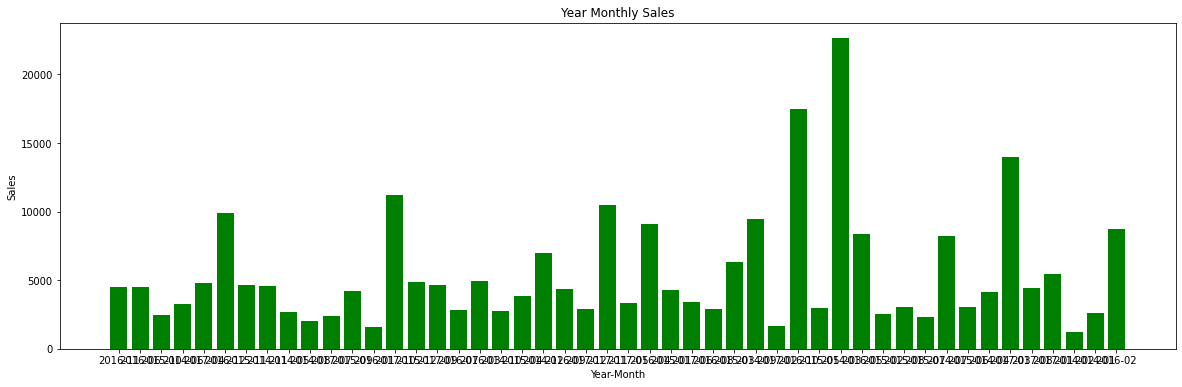

In [12]:
plt.figure(figsize=(20,6))
plt.bar(df_Year_Monthly_Sales['Year-Month'],df_Year_Monthly_Sales['Sales'], color = "green")
plt.title("Year Monthly Sales")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.show()

The above plot is a bar graph to plot to describe the monthly sales of the superstore sales with respect to the date(YYYY-MM) is at peak during 2017-11 with 118447.8250 and least during 2014-02 with 4519.8920

#Task 5

In [13]:
superstore["Year"] = superstore["Order Date"].dt.strftime('%Y')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price Per Unit,Year-Month,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,2016-11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,2016-11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,2016-06,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,2015-10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,2015-10,2015


In [14]:
df_Yearly_Sales  = pd.DataFrame(superstore["Year"])
df_Yearly_Sales["Sales"] = superstore["Sales"]
df_Yearly_Sales.groupby('Year')['Sales'].sum()

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

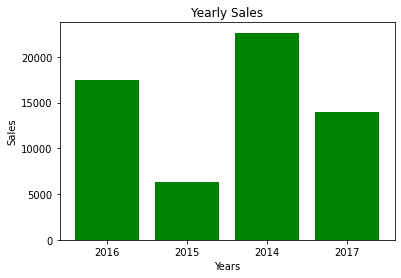

In [15]:
plt.bar(df_Yearly_Sales['Year'],df_Yearly_Sales['Sales'], color = "green")
plt.title("Yearly Sales")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.show()

The above plot is a bar graph to plot to describe the monthly sales of the superstore sales with respect to the date(YYYY) is at peak during 2017 with 733215.2552 and least during 2015 with 470532.5090

#Task 6

In [16]:
superstore["Month"] = superstore["Order Date"].dt.strftime('%m')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price Per Unit,Year-Month,Year,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,2016-11,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,2016-11,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,2016-06,2016,06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,2015-10,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,2015-10,2015,10


In [17]:
df_Monthly_Sales  = pd.DataFrame(superstore["Month"])
df_Monthly_Sales["Sales"] = superstore["Sales"]
df_Monthly_Sales.groupby("Month")['Sales'].sum()

Month
01     94924.8356
02     59751.2514
03    205005.4888
04    137762.1286
05    155028.8117
06    152718.6793
07    147238.0970
08    159044.0630
09    307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

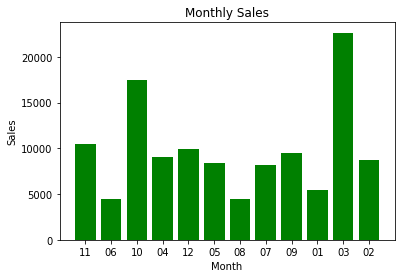

In [18]:
plt.bar(df_Monthly_Sales['Month'],df_Monthly_Sales['Sales'],color = "green")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

The above plot is a bar graph to plot to describe the monthly sales of the superstore sales with respect to the date(MM) is at peak during 09(September)with 307649.9457 and least during 02(February) 59751.2514

#Task 7

In [19]:
df_Product_ID_Sales  = pd.DataFrame(superstore["Product ID"])
df_Product_ID_Sales["Quantity"] = superstore["Quantity"]
group = df_Product_ID_Sales.groupby("Product ID")['Quantity'].sum()
group

Product ID
FUR-BO-10000112     9
FUR-BO-10000330    10
FUR-BO-10000362    14
FUR-BO-10000468    21
FUR-BO-10000711    12
                   ..
TEC-PH-10004912    11
TEC-PH-10004922    19
TEC-PH-10004924     8
TEC-PH-10004959     4
TEC-PH-10004977    32
Name: Quantity, Length: 1862, dtype: int64

In [20]:
group.sort_values(ascending=False).head(1)

Product ID
TEC-AC-10003832    75
Name: Quantity, dtype: int64

#Task 8

In [21]:
df_Customer_Name_Sales  = pd.DataFrame(superstore["Customer Name"])
df_Customer_Name_Sales["Quantity"] = superstore["Quantity"]
group = df_Customer_Name_Sales.groupby("Customer Name")['Quantity'].sum()
group

Customer Name
Aaron Bergman          13
Aaron Hawkins          54
Aaron Smayling         48
Adam Bellavance        56
Adam Hart              75
                     ... 
Xylona Preis          100
Yana Sorensen          58
Yoseph Carroll         31
Zuschuss Carroll      105
Zuschuss Donatelli     32
Name: Quantity, Length: 793, dtype: int64

In [22]:
group.sort_values(ascending=False).head(1)

Customer Name
Jonathan Doherty    150
Name: Quantity, dtype: int64

#Task 9

In [23]:
df_Customer_Name_Sales  = pd.DataFrame(superstore["Customer Name"])
df_Customer_Name_Sales["Sales"] = superstore["Sales"]
group = df_Customer_Name_Sales.groupby("Customer Name")['Sales'].sum()
group

Customer Name
Aaron Bergman          886.156
Aaron Hawkins         1744.700
Aaron Smayling        3050.692
Adam Bellavance       7755.620
Adam Hart             3250.337
                        ...   
Xylona Preis          2374.658
Yana Sorensen         6720.444
Yoseph Carroll        5454.350
Zuschuss Carroll      8025.707
Zuschuss Donatelli    1493.944
Name: Sales, Length: 793, dtype: float64

In [24]:
group.sort_values(ascending=False).head(1)

Customer Name
Sean Miller    25043.05
Name: Sales, dtype: float64

#Task 10

In [25]:
df_City_Sales  = pd.DataFrame(superstore["City"])
df_City_Sales["No of Customres"] = superstore["Customer Name"]
group = df_City_Sales.groupby("City")['No of Customres'].sum()
group

City
Aberdeen                                         Jeremy Lonsdale
Abilene                                              Dennis Kane
Akron          Maria BertelsonEd BraxtonEd BraxtonTed Trevino...
Albuquerque    Michelle LonsdaleMichelle LonsdaleBenjamin Far...
Alexandria     Roy CollinsShirley DanielsShirley DanielsShirl...
                                     ...                        
Woonsocket         Andy ReiterKristen HastingsDon JonesDon Jones
Yonkers        Karen DanielsKaren DanielsKaren DanielsKaren D...
York           Theresa SwintTheresa SwintTheresa SwintNoah Ch...
Yucaipa                                            Odella Nelson
Yuma           Nick ZanduskyTiffany HouseGary HansenDario Medina
Name: No of Customres, Length: 531, dtype: object

In [26]:
group.sort_values(ascending=False).head(1)

City
San Francisco    Zuschuss DonatelliZuschuss DonatelliZuschuss D...
Name: No of Customres, dtype: object

In [27]:
group.sort_values(ascending=False).tail(1)

City
Charlottesville    Adam ShillingsburgTamara Willingham
Name: No of Customres, dtype: object

In [28]:
df_City_Sales  = pd.DataFrame(superstore["City"])
df_City_Sales["Sales"] = superstore["Sales"]
group = df_City_Sales.groupby("City")['Sales'].sum()
group

City
Aberdeen         25.500
Abilene           1.392
Akron          2729.986
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Sales, Length: 531, dtype: float64

In [29]:
group.sort_values(ascending=False).head(1)

City
New York City    256368.161
Name: Sales, dtype: float64

In [30]:
group.sort_values(ascending=False).tail(1)

City
Abilene    1.392
Name: Sales, dtype: float64

In [31]:
df_City_Sales  = pd.DataFrame(superstore["City"])
df_City_Sales["Quantity"] = superstore["Quantity"]
group = df_City_Sales.groupby("City")['Quantity'].sum()
group

City
Aberdeen        3
Abilene         2
Akron          65
Albuquerque    65
Alexandria     84
               ..
Woonsocket     15
Yonkers        57
York           19
Yucaipa         5
Yuma           22
Name: Quantity, Length: 531, dtype: int64

In [32]:
group.sort_values(ascending=False).head(1)

City
New York City    3417
Name: Quantity, dtype: int64

In [33]:
group.sort_values(ascending=False).tail(1)

City
Port Orange    1
Name: Quantity, dtype: int64

#Task 11

In [34]:
df_Category_Sales  = pd.DataFrame(superstore["Category"])
df_Category_Sales["Sales"] = superstore["Sales"]
group = df_Category_Sales.groupby("Category")['Sales'].sum()
group

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [35]:
group.sort_values(ascending=False).head(1)

Category
Technology    836154.033
Name: Sales, dtype: float64

In [36]:
group.sort_values(ascending=False).tail(1)

Category
Office Supplies    719047.032
Name: Sales, dtype: float64

In [37]:
df_Category_Sales  = pd.DataFrame(superstore["Category"])
df_Category_Sales["Quantity"] = superstore["Quantity"]
group = df_Category_Sales.groupby("Category")['Quantity'].sum()
group

Category
Furniture           8028
Office Supplies    22906
Technology          6939
Name: Quantity, dtype: int64

In [38]:
group.sort_values(ascending=False).head(1)

Category
Office Supplies    22906
Name: Quantity, dtype: int64

In [39]:
group.sort_values(ascending=False).tail(1)

Category
Technology    6939
Name: Quantity, dtype: int64

#Task 12

In [40]:
df_Category_Sales  = pd.DataFrame(superstore["Sub-Category"])
df_Category_Sales["Sales"] = superstore["Sales"]
group = df_Category_Sales.groupby("Sub-Category")['Sales'].sum()
group

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

In [41]:
group.sort_values(ascending=False).head(1)

Sub-Category
Phones    330007.054
Name: Sales, dtype: float64

In [42]:
group.sort_values(ascending=False).tail(1)

Sub-Category
Fasteners    3024.28
Name: Sales, dtype: float64

In [43]:
df_Category_Sales  = pd.DataFrame(superstore["Sub-Category"])
df_Category_Sales["Quantity"] = superstore["Quantity"]
group = df_Category_Sales.groupby("Sub-Category")['Quantity'].sum()
group

Sub-Category
Accessories    2976
Appliances     1729
Art            3000
Binders        5974
Bookcases       868
Chairs         2356
Copiers         234
Envelopes       906
Fasteners       914
Furnishings    3563
Labels         1400
Machines        440
Paper          5178
Phones         3289
Storage        3158
Supplies        647
Tables         1241
Name: Quantity, dtype: int64

In [44]:
group.sort_values(ascending=False).head(1)

Sub-Category
Binders    5974
Name: Quantity, dtype: int64

In [45]:
group.sort_values(ascending=False).tail(1)

Sub-Category
Copiers    234
Name: Quantity, dtype: int64